# Mreza casopisa

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import scipy.stats as stats
import pickle

from itertools import chain, combinations
from scipy.cluster.hierarchy import dendrogram

from unidecode import unidecode
from collections import Counter
from operator import itemgetter

## Ucitavanje podataka

In [2]:
authorsDataPath = "magazine/data/authorsData.xlsx"
combinedWorksPath = "magazine/data/combinedWorks.xlsx"
workPerAuthorPath = "magazine/data/workPerAuthor.xlsx"
authorsAndWorksPath = "magazine/data/authorsAndWorks.xlsx"



authorsData = pd.read_excel(authorsDataPath)
combinedWorks = pd.read_excel(combinedWorksPath)
workPerAuthor = pd.read_excel(workPerAuthorPath)
authorsAndWorks = pd.read_excel(authorsAndWorksPath)

# authorsData.head(60)
authorsAndWorks.head(15)

,Unnamed: 0,id_author,Ime,Prezime,Katedra,H indeks,Broj radova,Kratko ime,id_work,Author,Title,Year,Source title,Cited by,Document Type,Research area
0,0,1,Tanja,Jovanovic,Katedra za mikrobiologiju,11,45,Jovanovic T.,291,Jovanovic T.,Risk factors for hepatocellular carcinoma: A c...,2010,Tumori,31,Article,Epidemiology
1,1,1,Tanja,Jovanovic,Katedra za mikrobiologiju,11,45,Jovanovic T.,527,Jovanovic T.,The role of single nucleotide polymorphisms of...,2014,Archives of Biological Sciences,0,Article,Immunology
2,2,1,Tanja,Jovanovic,Katedra za mikrobiologiju,11,45,Jovanovic T.,530,Jovanovic T.,The prevalence of the most important viral inf...,2012,Archives of Biological Sciences,0,Article,Immunology
3,3,1,Tanja,Jovanovic,Katedra za mikrobiologiju,11,45,Jovanovic T.,846,Jovanovic T.,Reduced quantity and hydrogen-peroxide product...,2005,Biomedicine and Pharmacotherapy,7,Article,Infective Diseases
4,4,1,Tanja,Jovanovic,Katedra za mikrobiologiju,11,45,Jovanovic T.,887,Jovanovic T.,The sequence analysis of Epstein-Barr virus EB...,2019,Medical Microbiology and Immunology,0,Article,Infective Diseases
5,5,1,Tanja,Jovanovic,Katedra za mikrobiologiju,11,45,Jovanovic T.,899,Jovanovic T.,Analysis of the variability of Epstein-Barr vi...,2016,Journal of Medical Biochemistry,0,Article,Infective Diseases
6,6,1,Tanja,Jovanovic,Katedra za mikrobiologiju,11,45,Jovanovic T.,903,Jovanovic T.,Carboxy-terminal sequence variation of LMP1 ge...,2012,Journal of Medical Virology,11,Article,Infective Diseases
7,7,1,Tanja,Jovanovic,Katedra za mikrobiologiju,11,45,Jovanovic T.,904,Jovanovic T.,Correlation between results of PCR and specifi...,2009,Acta chirurgica Iugoslavica,2,Article,Infective Diseases
8,8,1,Tanja,Jovanovic,Katedra za mikrobiologiju,11,45,Jovanovic T.,932,Jovanovic T.,Notch-a possible mediator between Epstein-Barr...,2020,Acta Odontologica Scandinavica,1,Article,Microbiology
9,9,1,Tanja,Jovanovic,Katedra za mikrobiologiju,11,45,Jovanovic T.,933,Jovanovic T.,The impact of environmental and behavioural co...,2018,Epidemiology and Infection,0,Article,Microbiology


In [4]:
authorsAndWorks.groupby('Source title').size().reset_index(name='Num of work per Soruce title').sort_values(by='Num of work per Soruce title', ascending=False).head(50)


,Source title,Num of work per Soruce title
47,Archives of Biological Sciences,86
493,Srpski arhiv za celokupno lekarstvo,73
318,Journal of Infection in Developing Countries,59
526,Vojnosanitetski Pregled,58
381,Medicinski pregled,53
492,Srpski Arhiv za Celokupno Lekarstvo,49
434,PLoS ONE,44
322,Journal of Medical Biochemistry,29
527,Vojnosanitetski pregled. Military-medical and ...,28
23,Acta chirurgica Iugoslavica,24


## Formiranje mreze casopisa

In [14]:
# Removing blanko characters
authorsAndWorks["Source title"] = authorsAndWorks["Source title"].apply(lambda x: x.strip())
# workPerAuthor.head(10)

# Netowrk labels
netowrkLabels = authorsAndWorks['Source title'].unique()
print(f"Broj casopisa je: {len(netowrkLabels)}")



magazineNetwork = nx.DiGraph()

# Dodavanje čvorova (časopisa)
magazineNetwork.add_nodes_from(authorsAndWorks['Source title'].unique())

# Dodavanje grana sa težinama (kolaboracije)
for _, group_data in authorsAndWorks.groupby('Author'):
    casopisi = group_data['Source title'].unique()
    if len(casopisi) > 1:
        for i in range(len(casopisi)):
            for j in range(i + 1, len(casopisi)):
                # Ako grana već postoji, povećaj težinu
                if magazineNetwork.has_edge(casopisi[i], casopisi[j]):
                    magazineNetwork.edges[casopisi[i], casopisi[j]]['weight'] += 1
                else:
                    # Ako grana ne postoji, dodaj je sa težinom 1
                    magazineNetwork.add_edge(casopisi[i], casopisi[j], weight=1)

print(magazineNetwork.edges.data("weight"))
print(magazineNetwork.number_of_nodes())
print(magazineNetwork.number_of_edges())

nx.write_gml(magazineNetwork, "magazine/models/mreza_casopisa.gml")

Broj casopisa je: 536
[('Tumori', 'Archives of Biological Sciences', 2), ('Tumori', 'Biomedicine and Pharmacotherapy', 2), ('Tumori', 'Medical Microbiology and Immunology', 1), ('Tumori', 'Journal of Medical Biochemistry', 1), ('Tumori', 'Journal of Medical Virology', 2), ('Tumori', 'Acta chirurgica Iugoslavica', 3), ('Tumori', 'Acta Odontologica Scandinavica', 1), ('Tumori', 'Epidemiology and Infection', 2), ('Tumori', 'Oral Diseases', 2), ('Tumori', 'Journal of NeuroVirology', 1), ('Tumori', 'International Endodontic Journal', 2), ('Tumori', 'Acta Veterinaria Brno', 1), ('Tumori', 'International Journal of Oral and Maxillofacial Implants', 1), ('Tumori', 'Biologicals', 2), ('Tumori', 'PLoS ONE', 1), ('Tumori', 'Italian Journal of Pediatrics', 1), ('Tumori', 'Journal of Clinical Virology', 1), ('Tumori', 'Journal of Oral Pathology and Medicine', 2), ('Tumori', 'Oral Microbiology and Immunology', 1), ('Tumori', 'Archives of Virology', 1), ('Tumori', 'Scottish Medical Journal', 1), ('Tu

## 2. Osnovna karakterizacija modelovanih mreža

### 2.1  Koeficient klasterizacije

In [15]:
H = magazineNetwork.to_undirected()

print("Broj povezanih kompnenti: " , nx.number_connected_components(H))

connected_componnets = sorted(nx.connected_components(H), key=len, reverse=True)
print("Velicina povezanih komponenti:")
for x in connected_componnets:
    print(len(x) , "  ")
    
print( "Prosecni koeficijent klasterizacije: " , nx.average_clustering(H), ", Globalni koeficijent klasterizacije: " , nx.transitivity(H) )

Broj povezanih kompnenti:  1
Velicina povezanih komponenti:
536   
Prosecni koeficijent klasterizacije:  0.832846235808478 , Globalni koeficijent klasterizacije:  0.6548100400218044


### 2.2  Lokalni Stepen klasterizacije

Max lokalni cc: 0.12655900460096028
Prosečan cc: 0.832846235808478
Lokalni stepeni klasterisanja koji nisu nula:
                                 Source title        Cc
15                                   PLoS ONE  0.022490
36                         Medicinski pregled  0.023372
1             Archives of Biological Sciences  0.024002
35        Srpski arhiv za celokupno lekarstvo  0.024598
48        Srpski Arhiv za Celokupno Lekarstvo  0.031883
..                                        ...       ...
102  Journal of Pediatric Hematology/Oncology  0.114412
173                             JAMA Oncology  0.114932
535                             Pancreatology  0.119113
47                   Journal of Helminthology  0.121964
101                                   Viruses  0.126559

[536 rows x 2 columns]


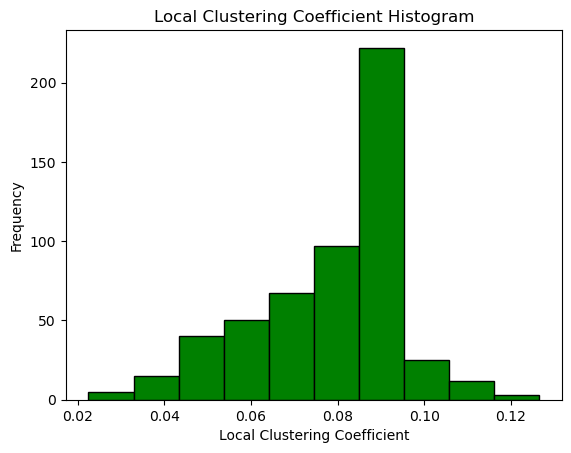

In [17]:
# Lokalni Stepen klasterizacije

author, clustering_coef = zip(*nx.clustering(H, weight = "weight").items())

nenula = [(auth, cc)  for auth, cc in zip(author, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["Source title", "Cc"])
df.sort_values('Cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(H)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)

# ax = df.plot.scatter(x='Author', y='Cc')
# ax.set_xscale("log")
# ax.set_yscale("log");


plt.hist(clustering_coef, bins=10, edgecolor='black', color = "green")

# Postavite naslove i oznake osa
plt.title('Local Clustering Coefficient Histogram')
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Frequency')

plt.savefig('magazine/images/local_cc_mag_network.png')
# Prikazivanje histograma
plt.show()


### 2.3  Asortativno mesanje

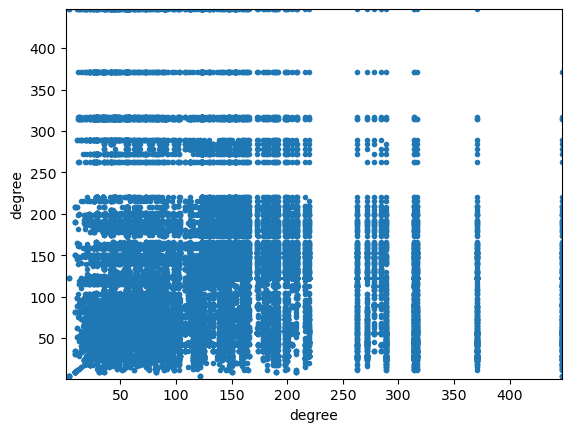

Koeficijent asortativnosti mesanja: -0.01213457741685564


In [20]:
# Asortativno mesanje

def plot_deg_corr(g, xscale = "linear", yscale = "linear"):
    first = []
    second = []
    for i, k in g.edges():
        first.append(g.degree(i))
        first.append(g.degree(k))
        second.append(g.degree(k))
        second.append(g.degree(i))

    plt.figure(1)   

    plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(first)) 

    plt.ylabel('degree')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(second))                                                                                                             

    plt.scatter(first, second, marker='.')        
    plt.savefig('magazine/images/mag_net_asortativity_mix.png')
    plt.show()

plot_deg_corr(H)

assortativity = nx.degree_assortativity_coefficient(H)
print(f"Koeficijent asortativnosti mesanja: {assortativity}")